Create dynamic interactive charts using ipywidgets & Seaborn. 

Instead of creating an endless number of charts to discover content, we can create interactive visual outputs using ipywidgets combined with seaborn. Seaborn has great tools to easily create charts from DataFrames.

Dataset used: IBM Analytics Employee Performance dataset from Kaggle.


Counting and examining the distribution of categorical data can be done with countplot — here we only have to input one categorical variable (x-axis), the counting and placing the subtotals on the y axis is done by Seaborn.

In [3]:
import pandas as pd                     
import matplotlib.pyplot as plt          
import numpy as np                      
from scipy.sparse import csr_matrix     
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("///Users/aa/Desktop//WA_Fn-UseC_-HR-Employee-Attrition.csv")

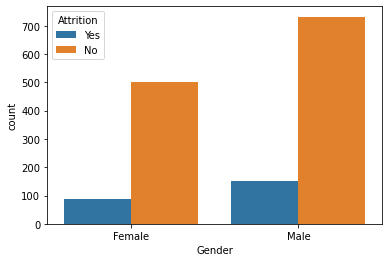

In [5]:
import seaborn as sns
g = sns.countplot (data = df, x = "Gender", hue = "Attrition")

Note the “hue” parameter — with that you can split the counted categorical data further along another dimension, like in our case the distribution of female and male employees by attrition.

One way of looking at relationships of numeric values is a relplot — here we have a point representing each value pair, hopefully visualizing some relationships when done on scale.

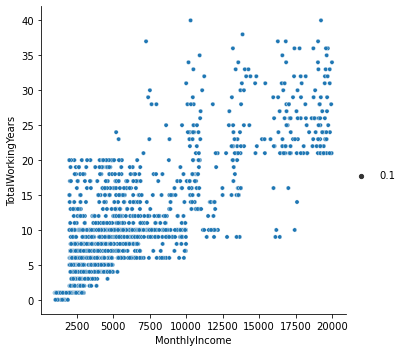

In [6]:
r = sns.relplot(data=df, x="MonthlyIncome", y="TotalWorkingYears", size=0.1)

A boxplot can be used to visualize some of the statistical features of numeric values, like minimum and maximum values, the mean, outliers, and so on. Boxplot below features the monthly income data per educational field.


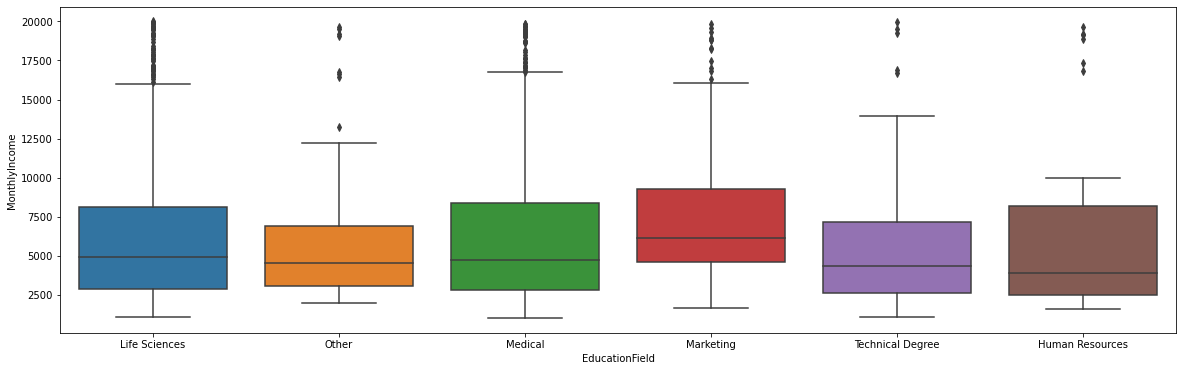

In [7]:
plt.figure(figsize=(20,6))
b = sns.boxplot(data=df, x="EducationField", y="MonthlyIncome")

Note the “figsize” parameter set at the first-line — setting the plot to be a bit wider is sometimes good for readability.
Seaborn has a ton of exciting features, the above examples are not giving justice to it by any stretch of the imagination — however, this is not an article on visualization tutorials. I'd recommend taking some time to read the official documentation if you are interested in learning more.

Interactive charts

Now that we have the two main elements, it is time for combining them to have the interactive visualization we are looking for. Let’s have a countplot that can visualize a selected categorical dimension!

For simplicity, I assume that categorical data is stored in “object” data types (this is not necessarily the case, not in the IBM dataset for sure, since the dimension “PerformanceRating” for instance is clearly categorical — however in order to avoid manual construction of lists I will run with this blunt overgeneralization).

In [8]:
categorical_column = [column for column in df.columns if df[column].dtype == "object"]
categorical_column

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

This list is going to be the basis of a dropdown selection widget.

In [9]:
import ipywidgets as widgets 
categorical_column = [column for column in df.columns if df[column].dtype == "object"]
categorical_column

dd = widgets.Dropdown (
    options=categorical_column,
    value=categorical_column[0],
    decription='Select a column'
)

Now we need a function accepting our selection from this dropdown, returning a countplot with the desired dimension. Nothing complicated as a starter, but I have thrown in a check to make sure that if we have several unique values in a column, rotate the x-axis labels for readability.

In [10]:
def draw_countplot(column): 
    p = sns.countplot (data=df, x=column)
    if len(df[column].unique()) >4:
        p.tick_params (axis="x" , rotation=90)

All we need now is to patch these elements together.

In [11]:
from ipywidgets import *
import ipywidgets as widgets
from IPython.display import display

import ipywidgets as widgets 
import seaborn as sns

dd = widgets.Dropdown (
    options=categorical_column,
    value=categorical_column [0],
    description= 'Select a column'
    

)

def draw_countplot(column): 
    p = sns.countplot (data=df, x=column)
    if len(df[column].unique()) > 4:
        p.tick_params(axis='x', rotation=90)
interact (draw_countplot, column=dd)
        

interactive(children=(Dropdown(description='Select a column', options=('Attrition', 'BusinessTravel', 'Departm…

<function __main__.draw_countplot(column)>

And here we are: if we select a new column, we get the chart updated.

The “hue” parameter is something I really like — can we do that dynamically too? Of course, we can. Just a few tweaks to our code.

In [12]:
import ipywidgets as widgets 
import seaborn as sns

dd1 = widgets.Dropdown(options=categorical_column, value=categorical_column[0], description="Column")
dd2 = widgets.Dropdown(options=categorical_column, value=categorical_column[0], description="Hue")

ui= widgets.HBox([dd1, dd2])

def draw_countplot(column, hue):
    p=sns.countplot(data=df, x=column, hue=hue)
    if len(df[column].unique()) >4:
        p.tick_params(axis='x', rotation=90)

out= widgets.interactive_output(draw_countplot, {'column': dd1, 'hue': dd2})
display(ui, out)



Output()

Examining numeric data relations can be achieved if we switch the columns in scope to the numeric dimensions (let’s keep the hue categorical just to be on the easy side) and the plot type to relplot.


In [13]:
categorical_columns = [column for column in df.columns if df[column].dtype =="object"]
numeric_columns =[column for column in df.columns if df[column].dtype== "int64"]

In [14]:
from ipywidgets import *
import ipywidgets as widgets
from IPython.display import display

import ipywidgets as widgets 
import seaborn as sns
dd1 = widgets.Dropdown(options=numeric_columns, description="Column1")
dd2 = widgets.Dropdown(options=numeric_columns, description= "Column2")
dd3 = widgets.Dropdown(options=categorical_columns, description="Hue")

ui = widgets.HBox([dd1, dd2, dd3])

def draw_countplot(column1, column2, hue):
    p = sns.relplot(data=df, x=column1, y=column2, hue=hue)
    
out = widgets.interactive_output(draw_countplot, {'column1':dd1, 'column2': dd2, 'hue': dd3})
display(ui, out)


Output()

Playing around with the dimension selection is a real-time saver when trying to find meaningful connections in the data.

With a numeric slider, we can narrow the underlying dataset, so that we can, for example, set a cap on the age of the employees we want to look at.

In [15]:
from ipywidgets import *
import ipywidgets as widgets
from IPython.display import display

import ipywidgets as widgets 
import seaborn as sns

dd1 = widgets.Dropdown(options=numeric_columns, description="Column1")
dd2 = widgets.Dropdown(options=numeric_columns, description= "Column2")
slider= widgets.IntSlider(min=df['Age'].min(), max=df['Age'].max(), description='Age Max')

ui = widgets.HBox([dd1, dd2, slider])

def draw_countplot(column1, column2, age):
    p = sns.relplot(data=df[df["Age"] <= age], x=column1, y=column2)
    
out = widgets.interactive_output(draw_countplot, {'column1':dd1, 'column2': dd2, 'age': slider})
display(ui, out)


Output()